In [1]:
#! git clone https://github.com/kaish114/darkflow
! git clone https://github.com/kaish114/darkflow.git

#clone your own repository

#https://github.com/kaish114/darkflow

Cloning into 'darkflow'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 2801 (delta 0), reused 0 (delta 0), pack-reused 2798
Receiving objects: 100% (2801/2801), 35.98 MiB | 3.64 MiB/s, done.
Resolving deltas: 100% (1803/1803), done.


In [2]:
cd ./darkflow/

/content/darkflow


In [3]:
ls

cfg/   darkflow/  flow*       LICENSE      README.md    setup.py  YOLO.ipynb
ckpt/  demo.gif   labels.txt  preview.png  sample_img/  test/


In [4]:
! python3 setup.py build_ext --inplace

Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[3/3] Cythonizing darkflow/cython_utils/nms.pyx
/usr/

In [5]:
! pip install -e .

Obtaining file:///content/darkflow
  Running setup.py develop for darkflow


In [6]:
! pip install .

Processing /content/darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp36-cp36m-linux_x86_64.whl size=831108 sha256=f1dba94b00d20cd4b7ed9ebb70a466f19da005c7610b4472904731753ff1c897
  Stored in directory: /tmp/pip-ephem-wheel-cache-067_ccd6/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow
  Found existing installation: darkflow 1.0.0
    Can't uninstall 'darkflow'. No files were found to uninstall.


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

W0905 15:14:22.862311 140674634393472 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:15: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0905 15:14:22.863903 140674634393472 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:16: The name tf.train.AdadeltaOptimizer is deprecated. Please use tf.compat.v1.train.AdadeltaOptimizer instead.

W0905 15:14:22.864878 140674634393472 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:17: The name tf.train.AdagradOptimizer is deprecated. Please use tf.compat.v1.train.AdagradOptimizer instead.

W0905 15:14:22.865718 140674634393472 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/build.py:18: The name tf.train.AdagradDAOptimizer is deprecated. Please use tf.compat.v1.train.AdagradDAOptimizer instead.

W0905 15:14:22.867173 140674634393472 deprecation_wrapper.py:119] From /content/darkflow/darkflow/net/buil

#Import your drive into Google colab:

In [8]:
## Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
ls

build/  darkflow/           flow*       preview.png  setup.py
cfg/    darkflow.egg-info/  labels.txt  README.md    test/
ckpt/   demo.gif            LICENSE     sample_img/  YOLO.ipynb


In [0]:
options = {"model": "./cfg/yolov2-voc-1c.cfg", 
           "load": "/content/gdrive/My Drive/YOLOV2/yolov2-voc.weights",
           "batch": 4,
           "epoch": 50,
           "gpu": 1.0,
           "train": True,
           "annotation": "/content/gdrive/My Drive/YOLO/annotations1/",
           "dataset": "/content/gdrive/My Drive/YOLO/images/"}

In [38]:
tfnet = TFNet(options)

Parsing ./cfg/yolov2-voc.cfg
Parsing ./cfg/yolov2-voc-1c.cfg
Loading /content/gdrive/My Drive/YOLOV2/yolov2-voc.weights ...
Successfully identified 202704264 bytes
Finished in 0.03517484664916992s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Load  |  Yep

In [39]:
tfnet.train()


./cfg/yolov2-voc-1c.cfg parsing /content/gdrive/My Drive/YOLO/annotations1/
Parsing for ['HINDI'] 


error: ignored

In [0]:
tfnet.savepb()

In [0]:
options = {"model": "cfg/yolov2-voc-1c.cfg",
           "load": 1000,
           "gpu": 1.0,
          "threshold":0.001}

In [15]:
tfnet2 = TFNet(options)

Parsing cfg/yolov2-voc-1c.cfg
Loading None ...
Finished in 0.00012636184692382812s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 

W0905 15:24:35.511464 140674634393472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Loading from ./ckpt/yolov2-voc-1c-1000
Finished in 6.485211372375488s



In [16]:
tfnet2.load_from_ckpt()

Loading from ./ckpt/yolov2-voc-1c-1000


In [17]:
#1example
import pprint as pp

original_img = cv2.imread("/content/gdrive/My Drive/YOLOV2/158.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[{'label': 'HINDI', 'confidence': 0.015508904, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 81, 'y': 45}}, {'label': 'HINDI', 'confidence': 0.01667327, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 128, 'y': 65}}, {'label': 'HINDI', 'confidence': 0.014073237, 'topleft': {'x': 21, 'y': 0}, 'bottomright': {'x': 139, 'y': 46}}, {'label': 'HINDI', 'confidence': 0.02386414, 'topleft': {'x': 82, 'y': 0}, 'bottomright': {'x': 190, 'y': 47}}, {'label': 'HINDI', 'confidence': 0.024770413, 'topleft': {'x': 138, 'y': 0}, 'bottomright': {'x': 248, 'y': 48}}, {'label': 'HINDI', 'confidence': 0.028882433, 'topleft': {'x': 189, 'y': 0}, 'bottomright': {'x': 303, 'y': 47}}, {'label': 'HINDI', 'confidence': 0.025328297, 'topleft': {'x': 246, 'y': 0}, 'bottomright': {'x': 356, 'y': 47}}, {'label': 'HINDI', 'confidence': 0.019713663, 'topleft': {'x': 300, 'y': 0}, 'bottomright': {'x': 411, 'y': 49}}, {'label': 'HINDI', 'confidence': 0.019784225, 'topleft': {'x': 353, 'y': 0}, 'bottomright': {'x'

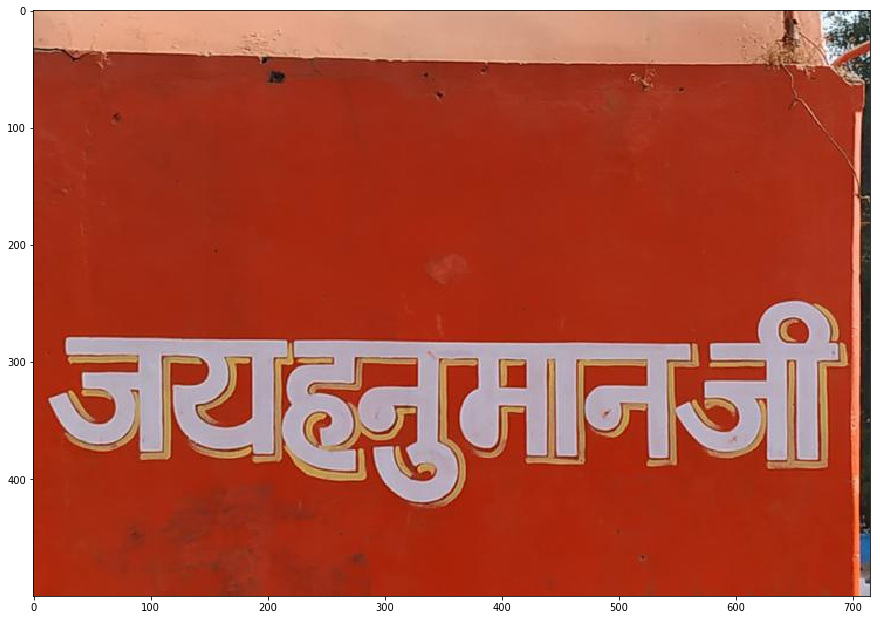

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.1:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage


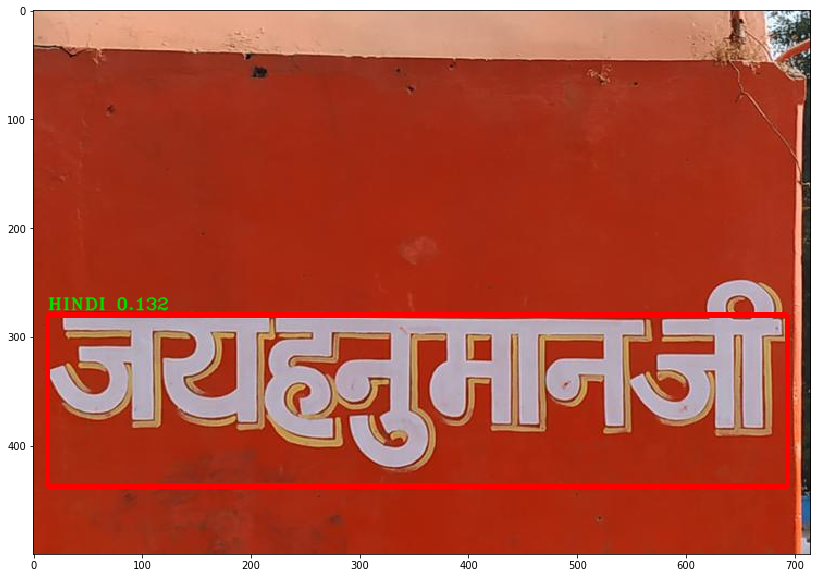

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [21]:
#2example
import pprint as pp

original_img = cv2.imread("/content/gdrive/My Drive/YOLOV2/Copy of 195.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[{'label': 'HINDI', 'confidence': 0.012648034, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 84, 'y': 43}}, {'label': 'HINDI', 'confidence': 0.01392224, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 131, 'y': 63}}, {'label': 'HINDI', 'confidence': 0.010749792, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 248, 'y': 265}}, {'label': 'HINDI', 'confidence': 0.008163026, 'topleft': {'x': 16, 'y': 0}, 'bottomright': {'x': 140, 'y': 45}}, {'label': 'HINDI', 'confidence': 0.011658746, 'topleft': {'x': 75, 'y': 0}, 'bottomright': {'x': 191, 'y': 48}}, {'label': 'HINDI', 'confidence': 0.00990162, 'topleft': {'x': 142, 'y': 0}, 'bottomright': {'x': 363, 'y': 55}}, {'label': 'HINDI', 'confidence': 0.010475144, 'topleft': {'x': 297, 'y': 0}, 'bottomright': {'x': 411, 'y': 44}}, {'label': 'HINDI', 'confidence': 0.013416946, 'topleft': {'x': 353, 'y': 0}, 'bottomright': {'x': 463, 'y': 44}}, {'label': 'HINDI', 'confidence': 0.011067336, 'topleft': {'x': 169, 'y': 0}, 'bottomright': {'x':

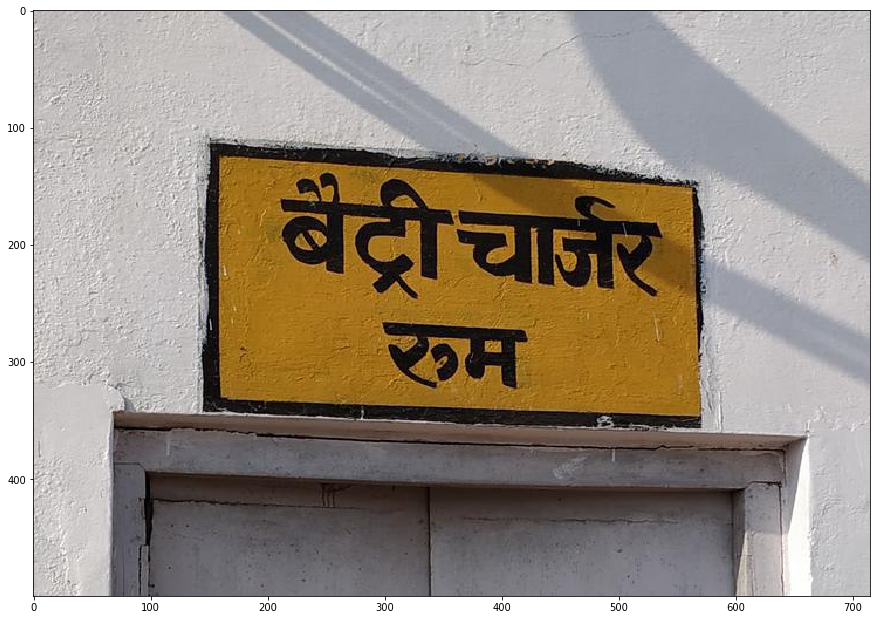

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.1:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage


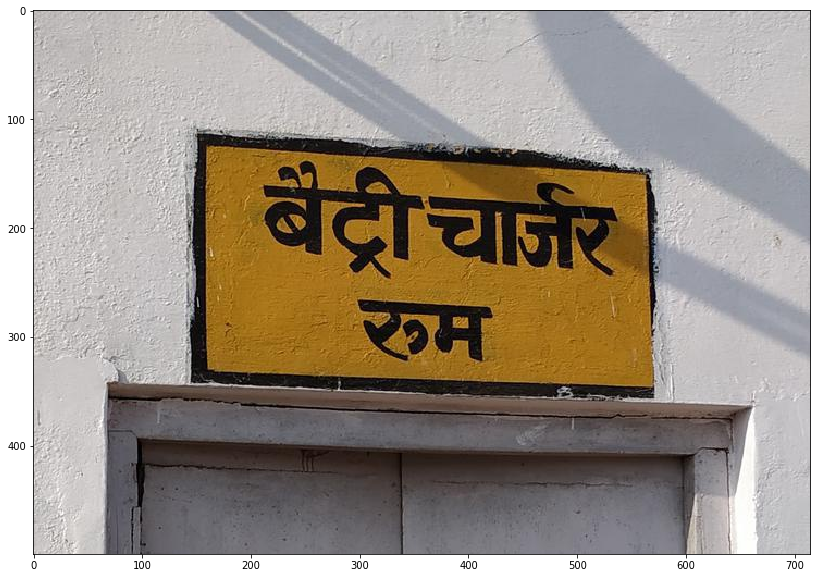

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [25]:
#3example
import pprint as pp

original_img = cv2.imread("/content/gdrive/My Drive/YOLOV2/example1.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[{'label': 'HINDI', 'confidence': 0.008930879, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 54, 'y': 50}}, {'label': 'HINDI', 'confidence': 0.00783602, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 99, 'y': 229}}, {'label': 'HINDI', 'confidence': 0.0074479426, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 161, 'y': 126}}, {'label': 'HINDI', 'confidence': 0.005788517, 'topleft': {'x': 32, 'y': 0}, 'bottomright': {'x': 88, 'y': 43}}, {'label': 'HINDI', 'confidence': 0.006341162, 'topleft': {'x': 46, 'y': 0}, 'bottomright': {'x': 132, 'y': 42}}, {'label': 'HINDI', 'confidence': 0.007197484, 'topleft': {'x': 122, 'y': 0}, 'bottomright': {'x': 208, 'y': 42}}, {'label': 'HINDI', 'confidence': 0.0074816006, 'topleft': {'x': 69, 'y': 0}, 'bottomright': {'x': 258, 'y': 52}}, {'label': 'HINDI', 'confidence': 0.0069743157, 'topleft': {'x': 15, 'y': 0}, 'bottomright': {'x': 314, 'y': 100}}, {'label': 'HINDI', 'confidence': 0.005703684, 'topleft': {'x': 180, 'y': 0}, 'bottomright': {'x

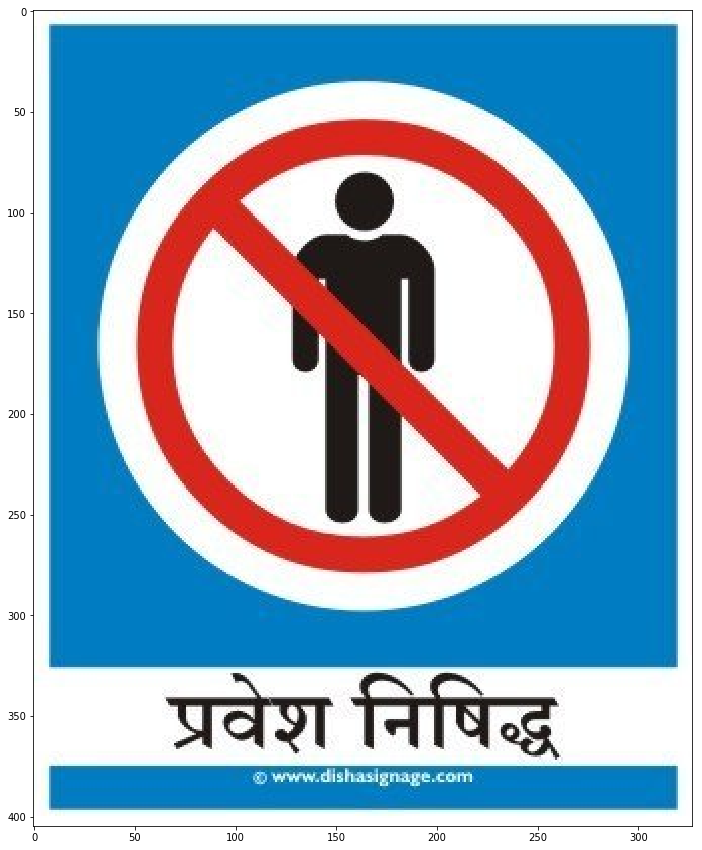

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.1:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage


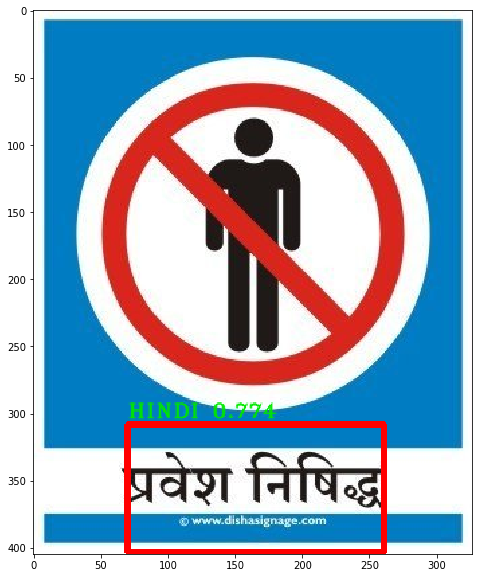

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [29]:
#4example
import pprint as pp

original_img = cv2.imread("/content/gdrive/My Drive/YOLOV2/example3.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(original_img)
print(results)

[{'label': 'HINDI', 'confidence': 0.013713707, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 116, 'y': 59}}, {'label': 'HINDI', 'confidence': 0.011524265, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 216, 'y': 252}}, {'label': 'HINDI', 'confidence': 0.011225481, 'topleft': {'x': 90, 'y': 0}, 'bottomright': {'x': 259, 'y': 53}}, {'label': 'HINDI', 'confidence': 0.00780477, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 367, 'y': 63}}, {'label': 'HINDI', 'confidence': 0.008559609, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 469, 'y': 245}}, {'label': 'HINDI', 'confidence': 0.006362169, 'topleft': {'x': 180, 'y': 0}, 'bottomright': {'x': 366, 'y': 52}}, {'label': 'HINDI', 'confidence': 0.007091948, 'topleft': {'x': 312, 'y': 0}, 'bottomright': {'x': 414, 'y': 57}}, {'label': 'HINDI', 'confidence': 0.013941695, 'topleft': {'x': 534, 'y': 0}, 'bottomright': {'x': 639, 'y': 67}}, {'label': 'HINDI', 'confidence': 0.014226711, 'topleft': {'x': 389, 'y': 0}, 'bottomright': {'x

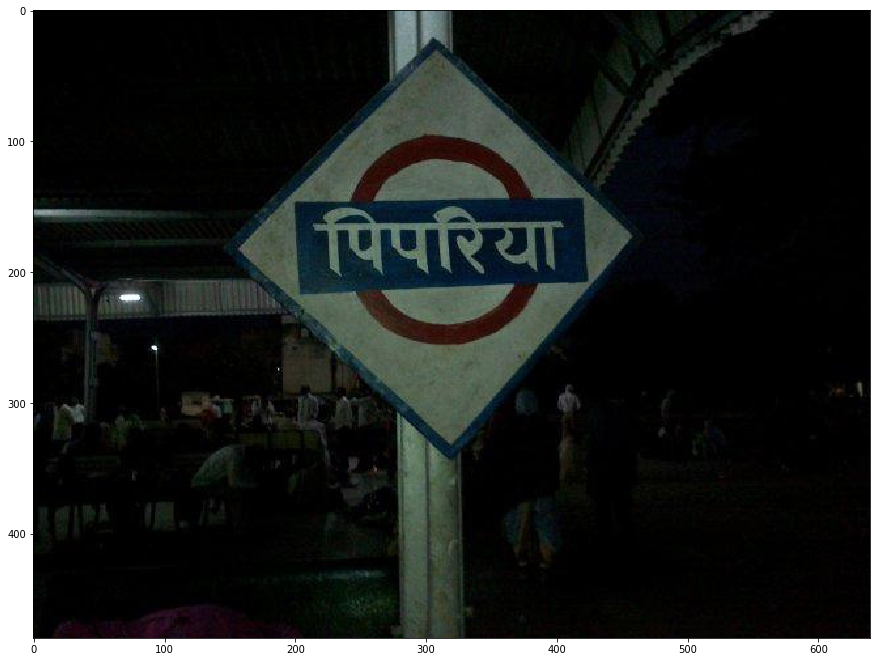

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.05:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage


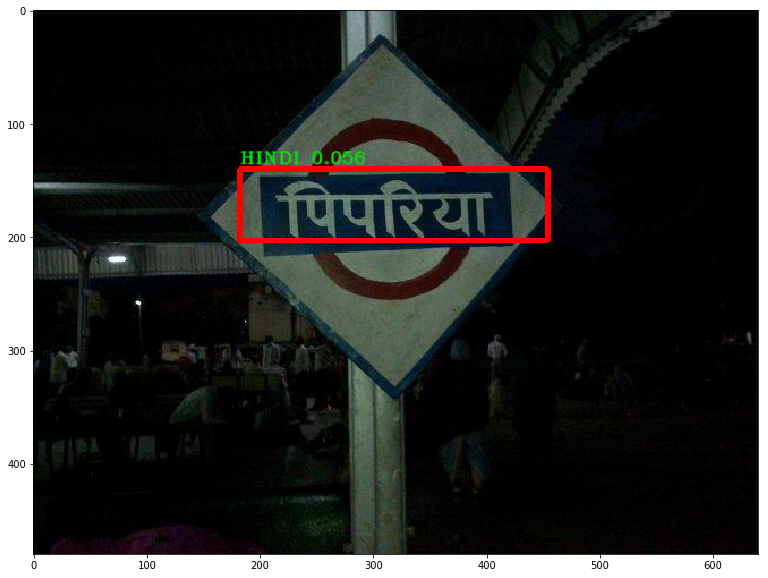

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [0]:
#Inference on video
# This code also can be used with webcam

cap = cv2.VideoCapture('/content/gdrive/My Drive/YOLOV2/test.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('/content/gdrive/My Drive/YOLOV2/output_test.mp4',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)      
        results = tfnet2.return_predict(frame)
        
        new_frame = boxing(frame, results)

        # Display the resulting frame
        out.write(new_frame)
        #cv2.imshow('frame', new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()